In [1]:
%matplotlib inline
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
# Load in csv
pyber_ride_df = pd.read_csv("Resources/PyBer_ride_data.csv")
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


<IPython.core.display.Javascript object>


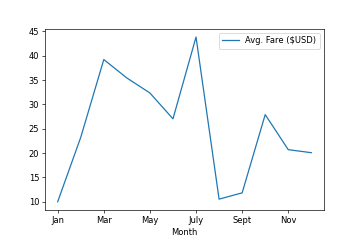

In [2]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.show()

<IPython.core.display.Javascript object>


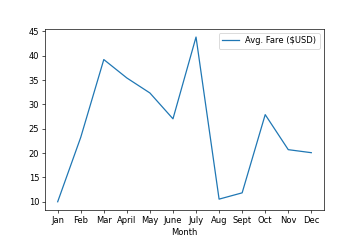

In [3]:
# Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]
# Plot the data.
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.xticks(tick_locations, pyber_ride_df["Month"])
plt.show()

<IPython.core.display.Javascript object>


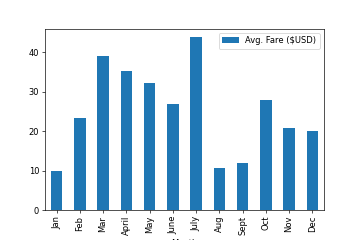

In [4]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind='bar')
plt.show()

<IPython.core.display.Javascript object>


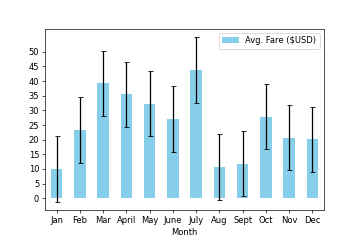

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [5]:
x=pyber_ride_df["Month"]
y=pyber_ride_df["Avg. Fare ($USD)"]
stdev=statistics.stdev(y)
pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)", color = 'skyblue', yerr=stdev, capsize=3)
plt.yticks(np.arange(0, 51, step=5.0))
plt.xticks(rotation=0)
plt.legend

In [6]:
# Import your data into a Pandas DataFrame.
    # Merge your DataFrames.
    # Create a bubble chart that showcases the average fare versus the total number of rides with bubble size 
    # based on the total number of drivers for each city type, including urban, suburban, and rural.
    # Determine the mean, median, and mode for the following:
        # The total number of rides for each city type.
        # The average fares for each city type.
        # The total number of drivers for each city type.
    # Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
        # The number of rides for each city type.
        # The fares for each city type.
        # The number of drivers for each city type.
    # Create a pie chart that visualizes each of the following data for each city type:
        # The percent of total fares.
        # The percent of total rides.
        # The percent of total drivers.



In [7]:
    # Files to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [8]:
    # Files to Read (city)
city_data_df=pd.read_csv(city_data_to_load)


In [9]:
    # Files to read (rides)
ride_data_df=pd.read_csv(ride_data_to_load)

In [10]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [12]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [13]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [15]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [16]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [17]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [18]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [19]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [20]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
